In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib notebook

TICKER = "^TYX"

In [2]:
ticker = yf.Ticker(TICKER).history(period="max")
ticker = ticker.loc[:, ["Close"]]
ticker.columns = ['close']
ticker.index.name = 'date'
ticker['dailyReturn'] = ticker['close'].pct_change()
ticker['sd'] = ticker.dailyReturn.rolling(63).std() * math.sqrt(252)
ticker

,close,dailyReturn,sd
date,,,
1977-02-15,7.700,NaN,NaN
1977-02-16,7.670,-0.003896,NaN
1977-02-17,7.670,0.000000,NaN
1977-02-18,7.760,0.011734,NaN
1977-02-22,7.770,0.001289,NaN
...,...,...,...
2022-04-29,2.947,0.006145,0.386677
2022-05-02,3.061,0.038683,0.392223
2022-05-03,3.006,-0.017968,0.395000


In [11]:
ticker.loc[ticker.dailyReturn >= 0.06,:]

,close,dailyReturn,sd,upDays
date,,,,
2008-09-19,4.366,0.061512,0.223655,2
2009-01-05,3.040,0.079929,0.436458,3
2009-01-21,3.138,0.064812,0.450140,3
2009-01-28,3.434,0.061843,0.476518,1
2009-02-13,3.682,0.063547,0.517024,2
2011-08-11,3.787,0.070379,0.277667,1
2011-10-27,3.446,0.068859,0.494747,2
2012-07-27,2.642,0.061044,0.316335,2
2016-11-09,2.882,0.097487,0.304425,3


<IPython.core.display.Javascript object>


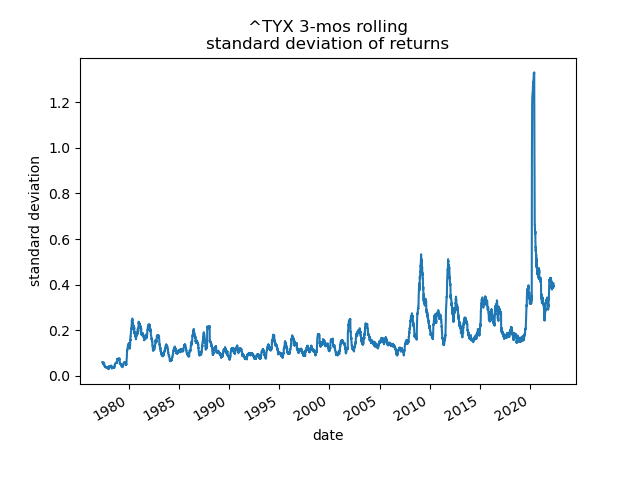

<AxesSubplot:title={'center':'^TYX 3-mos rolling\nstandard deviation of returns'}, xlabel='date', ylabel='standard deviation'>

In [3]:
fig1, ax1 = plt.subplots()
plt.ylabel("standard deviation")
titlestr = TICKER + " 3-mos rolling\nstandard deviation of returns"
plt.title(titlestr)
ticker.sd.plot(ax=ax1)

In [4]:
tickerm = pd.DataFrame(ticker.dailyReturn.resample("W").apply(lambda x: ((x + 1).cumprod() - 1).last("D")))
tickerm.rename(columns={'dailyReturn': 'weeklyReturn'}, inplace=True)
tickerm['sd'] = tickerm.weeklyReturn.rolling(13).std() * math.sqrt(52)


<IPython.core.display.Javascript object>


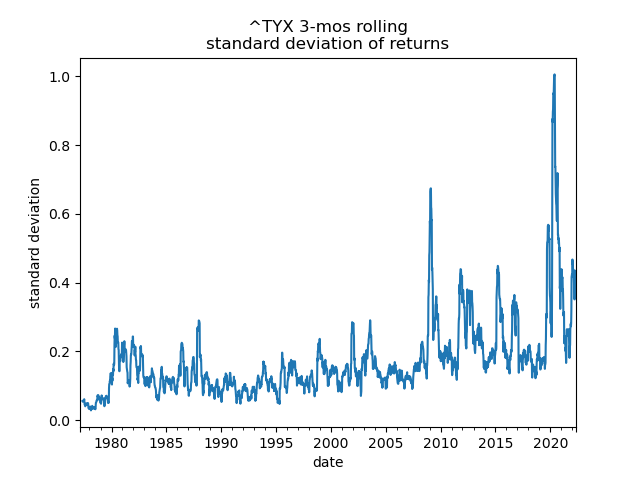

<AxesSubplot:title={'center':'^TYX 3-mos rolling\nstandard deviation of returns'}, xlabel='date', ylabel='standard deviation'>

In [5]:
fig1, ax1 = plt.subplots()
plt.ylabel("standard deviation")
titlestr = TICKER + " 3-mos rolling\nstandard deviation of returns"
plt.title(titlestr)
tickerm.sd.plot(ax=ax1)

In [6]:
def upDays(x):
    index = ticker.index.get_loc(x.name)
    if index == 0:
        return 0
    prev_x = ticker.iloc[index-1]
    if x['dailyReturn'] <= 0:
        return 0
    else:
        return upDays(prev_x) + 1


In [7]:
ticker['upDays'] = ticker.apply(upDays, axis=1)
ticker

,close,dailyReturn,sd,upDays
date,,,,
1977-02-15,7.700,NaN,NaN,0
1977-02-16,7.670,-0.003896,NaN,0
1977-02-17,7.670,0.000000,NaN,0
1977-02-18,7.760,0.011734,NaN,1
1977-02-22,7.770,0.001289,NaN,2
...,...,...,...,...
2022-04-29,2.947,0.006145,0.386677,3
2022-05-02,3.061,0.038683,0.392223,4
2022-05-03,3.006,-0.017968,0.395000,0


In [8]:
ticker.loc[ticker.upDays >= 8,:]

,close,dailyReturn,sd,upDays
date,,,,
1978-09-22,8.590,0.007034,0.059221,8
1981-04-30,13.650,0.011111,0.178571,8
1990-04-19,8.860,0.001130,0.119581,8
1990-04-20,8.930,0.007901,0.119205,9
1990-04-23,8.960,0.003359,0.119259,10
1990-04-24,8.980,0.002232,0.119045,11
1997-02-27,6.812,0.002207,0.119332,8
2012-09-13,2.967,0.014012,0.300507,8
2012-09-14,3.088,0.040782,0.310181,9


In [9]:
ticker['1950':'1986'].loc[ticker.sd > 0.3]

,close,dailyReturn,sd,upDays
date,,,,


In [10]:
ticker['2020':'2022'].loc[ticker.sd > 0.3]

,close,dailyReturn,sd,upDays
date,,,,
2020-01-02,2.341,-0.020092,0.321193,0
2020-01-03,2.249,-0.039299,0.327937,0
2020-01-06,2.281,0.014228,0.327777,1
2020-01-07,2.305,0.010522,0.327204,2
2020-01-08,2.358,0.022993,0.329739,3
...,...,...,...,...
2022-04-29,2.947,0.006145,0.386677,3
2022-05-02,3.061,0.038683,0.392223,4
2022-05-03,3.006,-0.017968,0.395000,0
